In [1]:
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import matplotlib.gridspec as gridspec
import spectral_analysis as sa
from scipy.special import erf
import datafidelity as df
import composite
import kaepora as kpora

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# all_uv = "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"
# SN_Array = composite.grab(all_uv, multi_epoch = True, make_corr = False)
# for SN in SN_Array:
#     if SN.minwave < 2800.:
#         print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

In [4]:
# print 'Need Phases:'
# for SN in SN_Array:
#     if SN.phase == None:
#         print SN.name, SN.filename, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave
# print
# print 'Need dm15s:'
# for SN in SN_Array:
#     if SN.dm15_source == None and SN.dm15_from_fits == None:
#         print SN.name, SN.filename, SN.mjd, SN.phase, SN.dm15_source, SN.dm15_from_fits, SN.source, SN.minwave

In [5]:
# test_uv_query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase between -3 and 3 and source='uv' or source='swift_uv' or source ='foley_hst' and ((dm15_source between 0 and 2.5) or (dm15_from_fits between 0 and 2.5))"]
# comp_test_uv, sn_arrays_test_uv, boot_sn_arrays_test_uv = query_db.main(len(test_uv_query), test_uv_query, boot='nb', medmean=2, verbose=True, multi_epoch=False, selection='max_coverage')

In [6]:
# dm15s = []
# for SN in sn_arrays_test_uv[0]:
#     if SN.dm15_source != None:
#         dm15s.append(SN.dm15_source)
#     else:
#         dm15s.append(SN.dm15_from_fits)
# plt.hist(dm15s, bins = 20)
# plt.show()

In [3]:
# query_dm15_max_fewer_bins = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7))",
#                          "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7))"]

query_dm15_max_fewer_bins = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= .95 and dm15_source < 1.15) or (dm15_from_fits >= .95 and dm15_from_fits < 1.15))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.25 and dm15_source < 1.42) or (dm15_from_fits >= 1.25 and dm15_from_fits < 1.42))",
                         "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.42 and dm15_source < 1.7) or (dm15_from_fits >= 1.42 and dm15_from_fits < 1.7))",
                             "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.7 or dm15_from_fits >= 1.7))"]


In [6]:
comps_dm15_max_fewer_bins_med, sn_arrays_med, boot_sn_arrays_med = kpora.make_composite(query_dm15_max_fewer_bins, boot=True, medmean=2, gini_balance=False, verbose=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
85 Total Spectra found
1 flagged spectra removed 84 spectra left
0 spectra of peculiar Ias removed 84 spectra left
81 spectra of SNe that have host reddening corrections
Arrays cleaned
81 spectra may have telluric contamination
30 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2005eq_combined None bsnip 80.5570871212012 0.273696890613031 0.8800000000000001 15.0 3230.0 10204.0
2006ot_combined None bsnip 68.94559895749491 -2.222541212595711 0.84 10.0 2960.0 8782.0
2004as_combined None cfa 116.47686269270928 0.5123836926346632 0.92 None 3612.0 7312.0
2006gr_combined None cfa 30.720731984824948 -1.328497110914312 0.8100000000000004 12.0 3366.0 7172.0
1994s_combined None bsnip 57.770984472156314 0.9910531415945931 0.9399999999999998 11.0 3076.0 11130.0
1999dq_combined None cfa 322.13

Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))
68 Total Spectra found
3 flagged spectra removed 65 spectra left
0 spectra of peculiar Ias removed 65 spectra left
57 spectra of SNe that have host reddening corrections
Arrays cleaned
57 spectra may have telluric contamination
18 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
1995e_combined None bsnip 99.16991579153026 -1.9711586875231253 1.1600000000000001 12.0 3088.0 11210.0
2002er_combined None other 410.0085929972205 1.7146590944816449 1.23 10.0 3186.0 10010.0
2003cq_combined None bsnip 29.74211747072116 -1.2576926141968046 1.1999999999999997 13.0 3036.0 10064.0
2002kf_combined None cfa 72.0686280693613 1.7963154526412717 1.1999999999999997 None 3652.0 739

13 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2006mr_combined None csp 99.19751923403706 -2.4343159393559657 1.9163719273424464 8.0 3766.0 9916.0
1999da_combined None bsnip 66.21314957003372 -2.689722267620132 1.8999999999999997 1.0 3252.0 10416.0
2007ax_combined None csp 59.160702107084994 -1.1280517476827743 1.8700000000000003 8.0 3380.0 9542.0
1998de_combined None cfa 53.22822660555484 0.4782098374577475 1.8799999999999992 8.0 3662.0 7418.0
1991bg_combined None bsnip 205.41880261829468 1.228666119456421 1.8268286491759538 3.0 3292.0 9866.0
1999by_combined None cfa 226.10913028315096 1.9263203510651297 1.97 12.0 3396.0 9258.0
2005ke_combined None csp 119.93193658365149 0.010866928766812048 1.82 10.0 3188.0 9542.0
1998bp_combined None cfa 183.88218640981398 -0.5512448268695588 1.7899999999999996 1.0 3684.0 7442.0
2002fb_combined None cfa 45.865789729343255 0.40792448528876496 1.77 1.0 3666.0 7424.0
2009f_combined None csp 235.0214

In [7]:
SN = sn_arrays_med[0][0]
print np.median(SN.ivar[SN.x1:SN.x2])

133359.61284447843


In [8]:
# comps_dm15_max_fewer_bins_mean, sn_arrays_mean, boot_sn_arrays_mean = query_db.main(len(query_dm15_max_fewer_bins), query_dm15_max_fewer_bins, boot=True, medmean=1, gini_balance=True, verbose=True, measure_vs=True)
comps_dm15_max_fewer_bins_mean, sn_arrays_mean, boot_sn_arrays_mean = kpora.make_composite(query_dm15_max_fewer_bins, boot=True, medmean=1, gini_balance=True, verbose=True, measure_vs=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source < .95 or dm15_from_fits < .95))
85 Total Spectra found
1 flagged spectra removed 84 spectra left
0 spectra of peculiar Ias removed 84 spectra left
81 spectra of SNe that have host reddening corrections
Arrays cleaned
81 spectra may have telluric contamination
30 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2005eq_combined None bsnip 80.5570871212012 0.273696890613031 0.8800000000000001 15.0 3230.0 10204.0
2006ot_combined None bsnip 68.94559895749491 -2.222541212595711 0.84 10.0 2960.0 8782.0
2004as_combined None cfa 116.47686269270928 0.5123836926346632 0.92 None 3612.0 7312.0
2006gr_combined None cfa 30.720731984824948 -1.328497110914312 0.8100000000000004 12.0 3366.0 7172.0
1994s_combined None bsnip 57.770984472156314 0.9910531415945931 0.9399999999999998 11.0 3076.0 11130.0
1999dq_combined None cfa 322.13

Gini balancing...
Balanced after 20 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and ((dm15_source >= 1.15 and dm15_source < 1.25) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.25))
68 Total Spectra found
3 flagged spectra removed 65 spectra left
0 spectra of peculiar Ias removed 65 spectra left
57 spectra of SNe that have host reddening corrections
Arrays cleaned
57 spectra may have telluric contamination
18 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
1995e_combined None bsnip 99.16991579153026 -1.9711586875231253 1.1600000000000001 12.0 3088.0 11210.0
2002er_combined None other 410.0085929972205 1.7146590944816449 1.23 10.0 3186.0 10010.0
2003cq_combined None bsnip 29.74211747072116 -1.2576926141968046 1.1999999999999997 13.0 3036.0 10064.0
2002kf_combined None cfa 72.0686280693613 1.7963

47 Total Spectra found
3 flagged spectra removed 44 spectra left
1 spectra of peculiar Ias removed 43 spectra left
36 spectra of SNe that have host reddening corrections
Arrays cleaned
36 spectra may have telluric contamination
13 total SNe
removed spectra of SNe with A_V > 2.0
SN Filename Source SNR Phase Dm15 Minwave Maxwave
2006mr_combined None csp 99.19751923403706 -2.4343159393559657 1.9163719273424464 8.0 3766.0 9916.0
1999da_combined None bsnip 66.21314957003372 -2.689722267620132 1.8999999999999997 1.0 3252.0 10416.0
2007ax_combined None csp 59.160702107084994 -1.1280517476827743 1.8700000000000003 8.0 3380.0 9542.0
1998de_combined None cfa 53.22822660555484 0.4782098374577475 1.8799999999999992 8.0 3662.0 7418.0
1991bg_combined None bsnip 205.41880261829468 1.228666119456421 1.8268286491759538 3.0 3292.0 9866.0
1999by_combined None cfa 226.10913028315096 1.9263203510651297 1.97 12.0 3396.0 9258.0
2005ke_combined None csp 119.93193658365149 0.010866928766812048 1.82 10.0 3188.0

In [21]:
# query_db.save_comps_to_files(comps_dm15_max_fewer_bins_mean, 'siebert_max_light_dm15')

0.22 0.87 0.017
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=30_Nspec=81_phase=p0.22_dm15=0.87_z=0.017.txt
0.37 1.06 0.013
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=61_Nspec=157_phase=p0.37_dm15=1.06_z=0.013.txt
0.4 1.2 0.017
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=16_Nspec=48_phase=p0.4_dm15=1.2_z=0.017.txt
0.57 1.32 0.016
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=23_Nspec=78_phase=p0.57_dm15=1.32_z=0.016.txt
-0.11 1.57 0.016
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=21_Nspec=52_phase=m0.11_dm15=1.57_z=0.016.txt
-0.16 1.87 0.009
../data/S19_Composite_Spectra/siebert_max_light_dm15_N=13_Nspec=36_phase=m0.16_dm15=1.87_z=0.009.txt


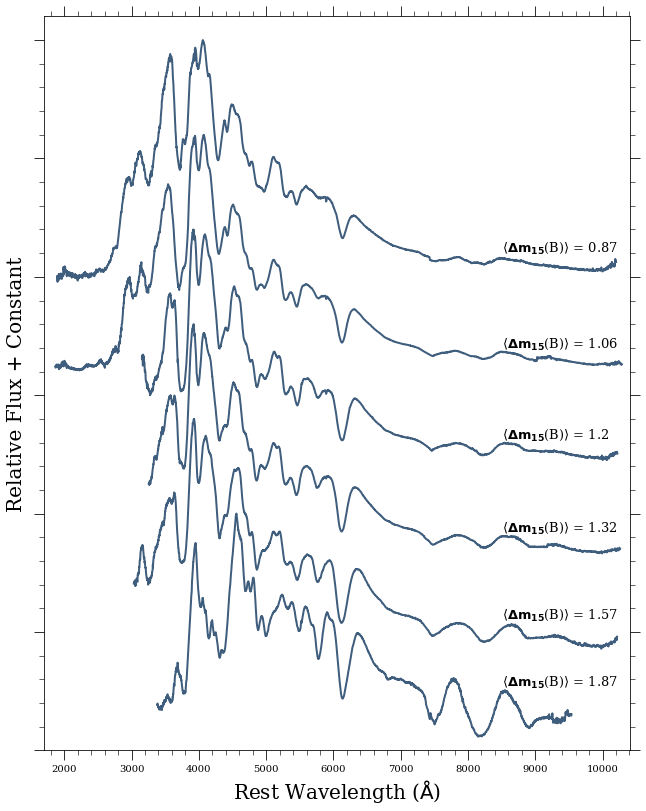

In [9]:
query_db.set_min_num_spec(comps_dm15_max_fewer_bins_mean, 5)
# query_db.stacked_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/dm15_split_max')
query_db.stacked_plot(comps_dm15_max_fewer_bins_mean)

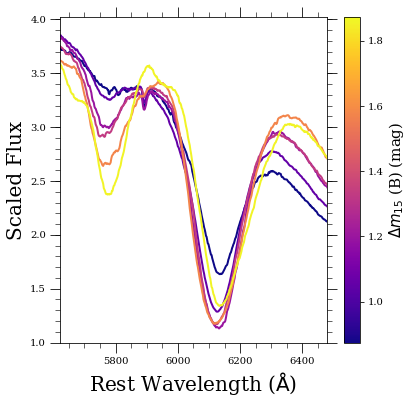

In [10]:
# query_db.si_plot(comps_dm15_max_fewer_bins_mean, savename = 'main_composites_updated/si_region')
query_db.si_plot(comps_dm15_max_fewer_bins_mean)

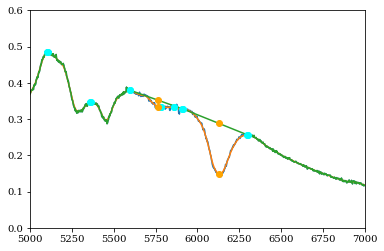

0.89 0.132393784513822


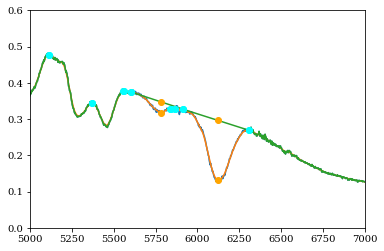

1.07 0.17964697874772337


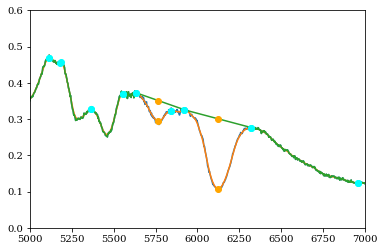

1.2 0.2913174592168947


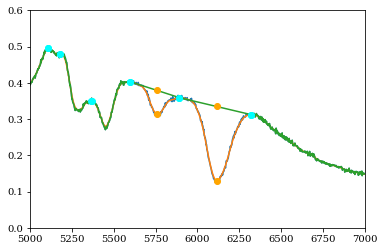

1.29 0.318094506458964


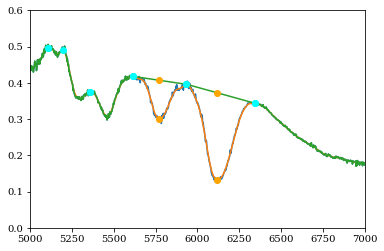

1.57 0.4454979907772003


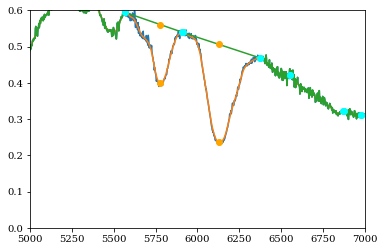

1.88 0.5987240885374502


In [11]:
si_ratios_med = []
phases_med = []
dm15s_med = []
for comp in comps_dm15_max_fewer_bins_med:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.002, dm15=dm15)
    print dm15, r
    phases_med.append(p)
    dm15s_med.append(dm15)
    si_ratios_med.append(r)

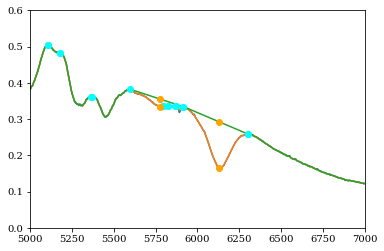

0.87 0.1692546933432497


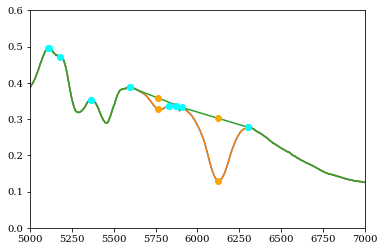

1.06 0.17343021269875142


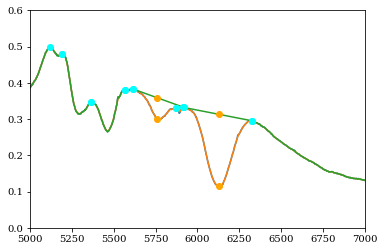

1.2 0.2886778330529055


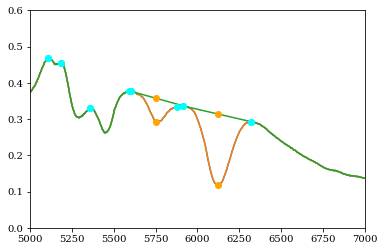

1.32 0.3307234449583861


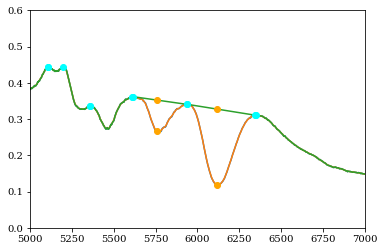

1.57 0.4128488721488016


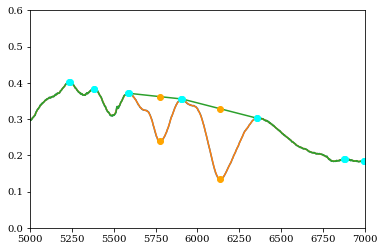

1.87 0.6391962507494956


In [12]:
si_ratios_mean = []
phases_mean = []
dm15s_mean = []
for comp in comps_dm15_max_fewer_bins_mean:
    p = np.average(comp.phase_array[comp.x1:comp.x2])
    dm15 = np.round(np.nanmean(comp.dm15_array[comp.x1:comp.x2]),2)
    r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, dm15=dm15)
    print dm15, r
    phases_mean.append(p)
    dm15s_mean.append(dm15)
    si_ratios_mean.append(r)

In [13]:
boot_ratios_med = []
errors_med  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_med)):
    rs = []
    print k
    for comp in boot_sn_arrays_med[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        if k != len(boot_sn_arrays_mean) - 1:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
            if ~np.isnan(r):
                rs.append(r)
        else:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False, dm15=1.8)
            if ~np.isnan(r) and r > .5: #some bad measurements below .5
                rs.append(r)
    boot_ratios_med.append(rs)

0
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could 

In [14]:
boot_ratios_mean = []
errors_mean  = []
percentile = erf(1/np.sqrt(2.))
low_pc = 0.5 - percentile*0.5
up_pc = 0.5 + percentile*0.5
# for k in range(len(boot_sn_arrays[0:27])):
for k in range(len(boot_sn_arrays_mean)):
    rs = []
    print k
    for comp in boot_sn_arrays_mean[k]:
        r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
        if k != len(boot_sn_arrays_mean) - 1:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False)
            if ~np.isnan(r):
                rs.append(r)
        else:
            r = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], vexp=.001, plot=False, dm15=1.8)
            if ~np.isnan(r) and r > .5: #some bad measurements below .5
                rs.append(r)
        
    boot_ratios_mean.append(rs)

0
1
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could not find maximum in a specified range!
Could 

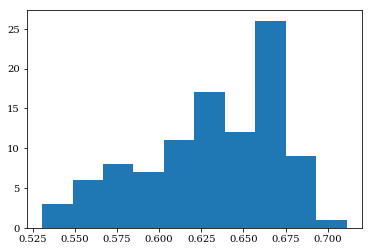

In [15]:
plt.hist(boot_ratios_mean[-1])
plt.show()

In [16]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_med = np.asarray(boot_ratios_med)
for j in range(len(boot_ratios_med)):
    r_resids = []
    r_resids.append(boot_ratios_med[j] - si_ratios_med[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_med = [low_errors, up_errors]

In [17]:
low_errors = []
up_errors = []
boot_resids = []
boot_ratios_mean = np.asarray(boot_ratios_mean)
for j in range(len(boot_ratios_mean)):
    r_resids = []
    r_resids.append(boot_ratios_mean[j] - si_ratios_mean[j])
    resid_sort = np.sort(r_resids)[0]
    boot_resids.append(resid_sort)
    low_ind = np.round((len(resid_sort)-1) * low_pc).astype(int)
    up_ind = np.round((len(resid_sort)-1) * up_pc).astype(int)
    low_errors.append(np.absolute(resid_sort[low_ind]))
    up_errors.append(resid_sort[up_ind])
#     errors.append(np.nanstd(rs))
errors_mean = [low_errors, up_errors]

0
0.16104006131125614 133359.61284447843


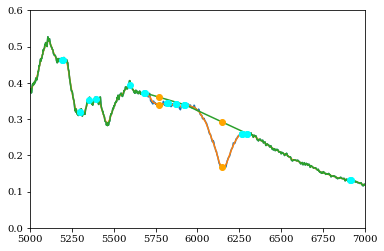

2005eq_combined 0.8800000000000001 0.18367668791019698 Check:  0.0015 82.97708299417066 80.5570871212012
0.19567798243452728 192528.79153556228


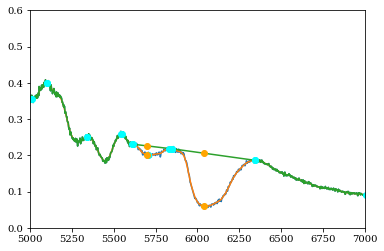

2006ot_combined 0.84 0.16676908516384867 Check:  0.0015 66.35348216601345 68.94559895749491
0.36457960157252123 110687.07415799827


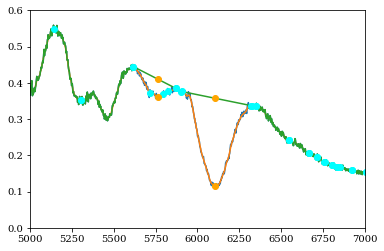

2004as_combined 0.92 0.2027522924284995 Check:  0.001 111.71333886295776 116.47686269270928
0.30512967238942357 10482.397788529825


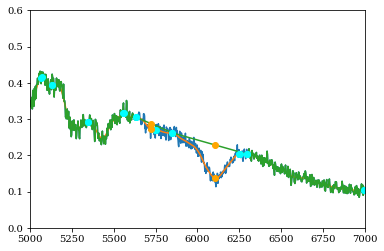

2006gr_combined 0.8100000000000004 0.16881136783470474 Check:  0.003 28.93491506284008 30.720731984824948
0.11453259604884163 150356.23011384456


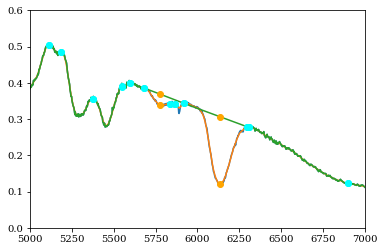

1994s_combined 0.9399999999999998 0.15545608766942137 Check:  0.0015 73.16121601060578 57.770984472156314
0.40147729483901207 802921.7468870896


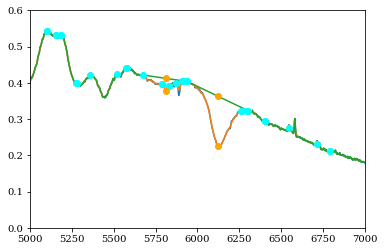

1999dq_combined 0.8599999999999999 0.2572735189984369 Check:  0.001 311.3653571296671 322.133476483695
0.3692657298004204 8483.718972910297


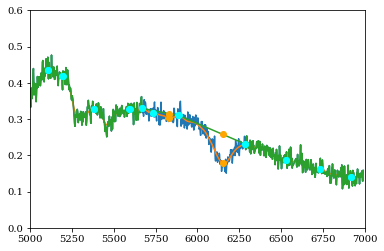

2006oa_combined 0.8900000000000001 0.14263140102920924 Check:  0.003 30.975118202744714 32.91019536201869
0.11850033395716948 261255.6840866008


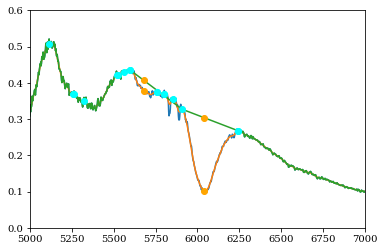

2002cd_combined 0.8399999999999999 0.14233633890141806 Check:  0.0015 60.6060613402221 54.310061498043886
0.14361994603417982 238769.4249258805


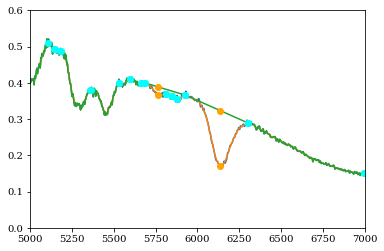

2013dy_combined 0.92 0.15037021429431707 Check:  0.0015 90.48335761576115 79.72865935954651
0.1706211940456102 74988.73995116251


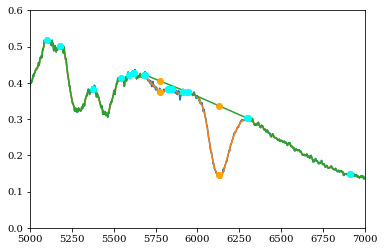

2001cp_combined 0.8800000000000001 0.1523615987506983 Check:  0.0015 61.23956044841066 55.3310169049101
0.15844566740462895 72128.40300119856


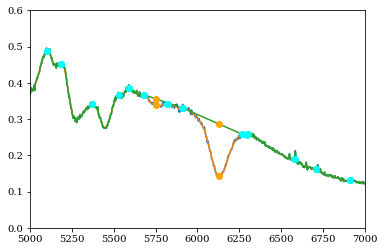

2006s_combined 0.9299999999999999 0.12064291730783099 Check:  0.0015 73.49009238460414 65.71961350776407
0.1813042173683663 138845.27469533865


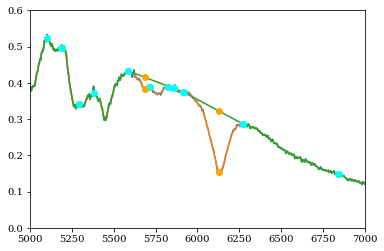

2001eh_combined 0.9199999999999999 0.19299138333983717 Check:  0.0015 81.87458221201935 81.26080224885855
0.0746669919312945 5121.35195876717
Could not find maximum in a specified range!
1991t_combined 0.8985410500085931 nan Check:  0.004 15.036492387030643 10.749914806891585
0.33570147582892557 32288.616574841522


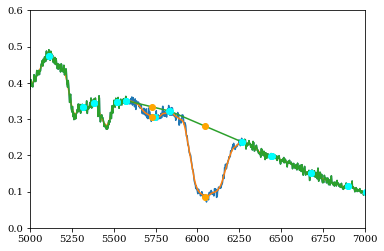

2001ay_combined 0.6799999999999999 0.14895406906959988 Check:  0.002 49.590276035118116 53.38684536812527
0.38236808045626514 6698.065894142614


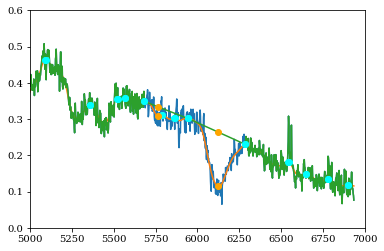

2006cj_combined 0.8100000000000003 0.17384056648479265 Check:  0.003 26.540877579745924 28.72877140745618
0.13491783481949207 409607.2701327141


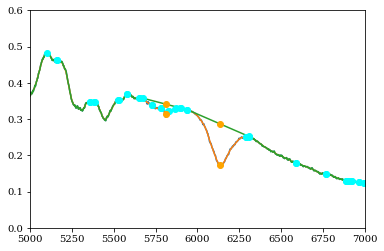

1999aa_combined 0.7799999999999999 0.24725508826517273 Check:  0.001 139.689717910944 124.73695875050188
0.15969596131987576 2108272.239159423


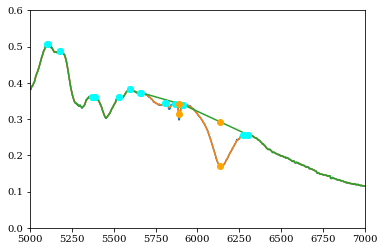

1998es_combined 0.8499999999999996 0.23944575545625443 Check:  0.001 282.3630232079097 275.1835426402689
0.36522657466732333 89842.77805697029


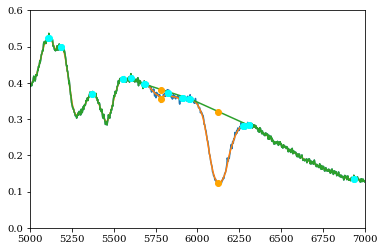

2002jy_combined 0.8800000000000001 0.1265854254612489 Check:  0.0015 91.44800270432405 99.24886529223913
0.3751282212235834 56420.93075472653


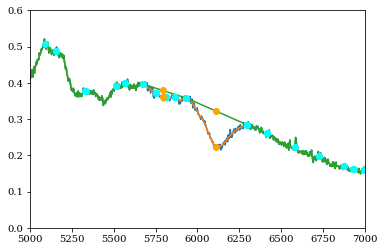

1999gp_combined 0.8699999999999999 0.19516192472881946 Check:  0.0015 76.68991750375373 80.45325948438128
0.1999785396690602 842895.6801981973


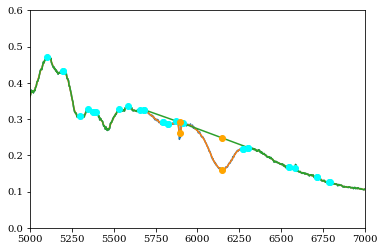

2007s_combined 0.9399999999999997 0.3446138529922509 Check:  0.001 144.0942030281542 160.17971897298975
0.1558072144351174 199992.52967313858


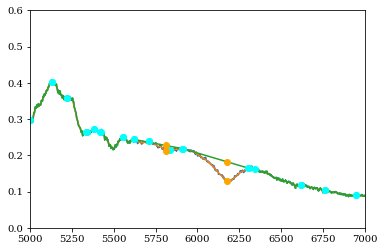

2005m_combined 0.87 0.26854012400997856 Check:  0.0015 82.707811535286 96.12152303737854
0.1545106915724654 11025.358591010792


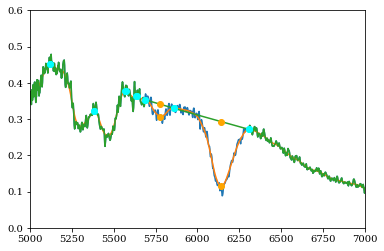

2006cq 0.938834805412 0.1917687599841672 Check:  0.003 22.458606766310883 18.809711304
0.39253199702272956 21487.410765342676


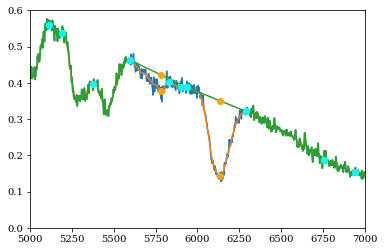

1996c 0.93 0.21354626135527713 Check:  0.002 49.10108442231438 52.462625645
0.11511600305249053 185444.48843607426


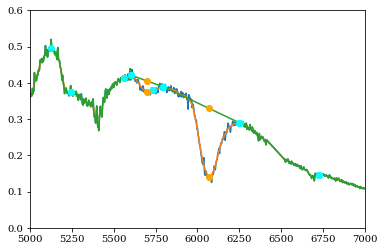

2006is 0.852109516951 0.1604913930534738 Check:  0.002 54.71930581493689 51.6970160574
0.16692063705999827 26929.587015825415


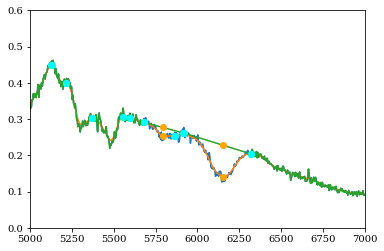

2007ai 0.852109516951 0.2722406158689495 Check:  0.003 29.481836332104056 31.315916639
0.1779602969398807 259942.029875274


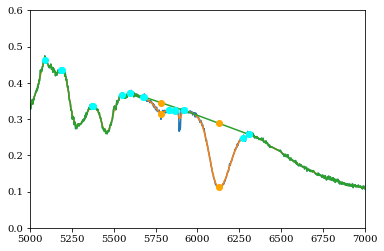

2007ca 0.89 0.17371558063170806 Check:  0.0015 87.20582410573792 85.1513263012
0.06668530856226682 1819.507376891396
Could not find maximum in a specified range!
1990n 0.943599627942 nan Check:  0.004 7.3009743310076916 3.49275407574
1
0.2645930674473572 5009.39274816837


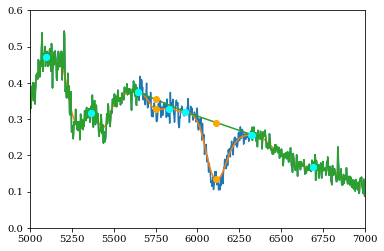

2005ag_combined 1.0465189775571149 0.17590307500849622 Check:  0.004 18.113710125364012 18.88840445527936
0.15823936575680814 17796665.723449737


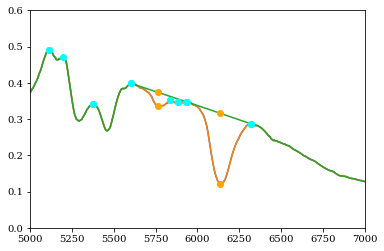

2003du_combined 1.0700000000000003 0.19778613757779792 Check:  0.001 996.0540962042202 999.9966364952229
0.12353797960261242 3507634.441013018


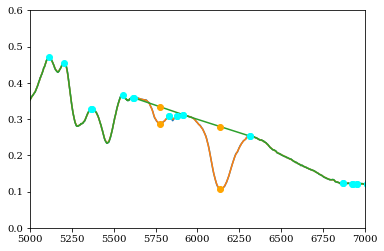

2005cf_combined 1.0999999999999999 0.2739357716880513 Check:  0.001 381.16644383982873 240.499970442752
0.3467119429736074 23476.780053707273


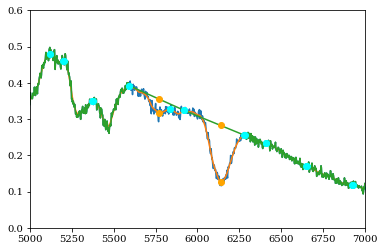

2002ck_combined 1.08 0.24683028690792216 Check:  0.002 44.685511420693985 48.40766288075774
0.32051348493157217 1519405.886987408


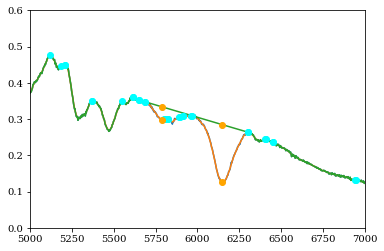

2002fk_combined 1.1299999999999997 0.22607375330748905 Check:  0.001 343.303173923198 367.76380163823086
0.328215555647359 4977144.098779226


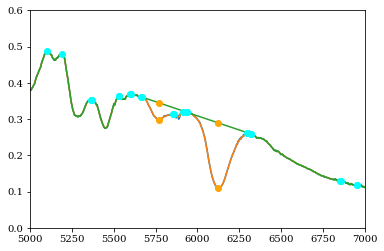

1998bu_combined 1.0299999999999998 0.2642663986484414 Check:  0.001 606.9312524387577 655.8414890577808
0.1355320271758505 1687659.6370406763


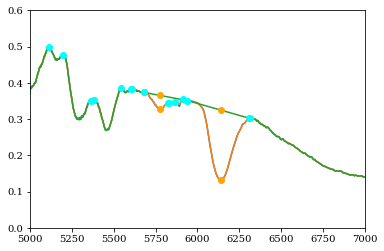

2011by_combined 1.1400000000000001 0.19323692673860288 Check:  0.001 275.8875029524634 248.65192624856854
0.13744950490739966 6116701.365354901


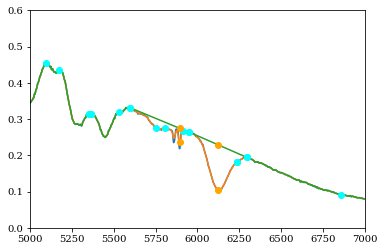

2008fp_combined 0.9793008064190225 0.3084745313564639 Check:  0.001 232.1163124785373 223.077481686576
0.2297224552814434 893244.7874279199


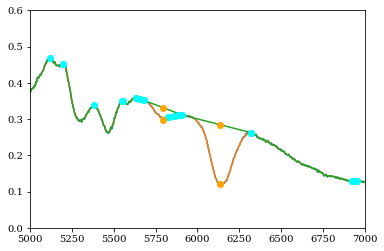

2006ax_combined 1.0600000000000003 0.20476814294103227 Check:  0.001 190.33055541625723 201.35732883192037
0.3080957495047433 216675.68651549623


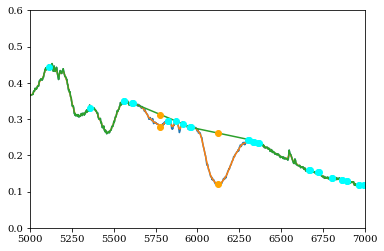

1997dt_combined 1.0399999999999998 0.23402031529971623 Check:  0.001 120.47738276385769 123.23673159775694
0.1336537791844819 7458822.058664445


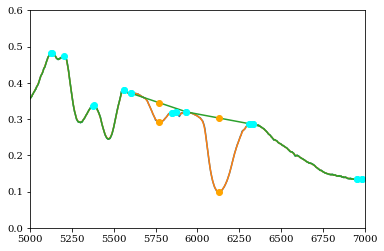

2007af_combined 1.04 0.25871246108601215 Check:  0.001 474.0354411539194 409.7111693895127
0.2171568391034537 1075271.2800386413


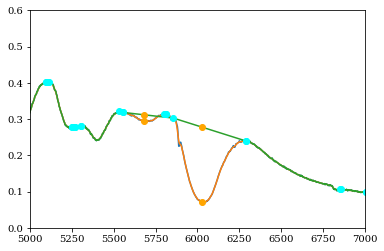

1997bp_combined 1.08 0.0815089793829547 Check:  0.001 182.17094764133267 187.20484591431742
0.12824305550654994 33041290.34449391


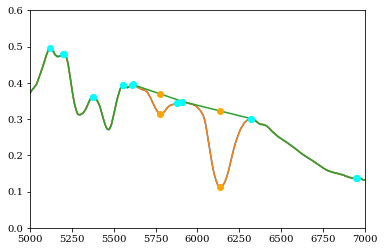

2011fe_combined 1.1080000000000003 0.2625177598709109 Check:  0.001 1484.0308037873474 1693.9163079317125
0.12460913463792522 115375.82423247019


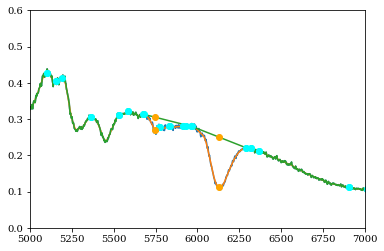

2005na_combined 1.0899999999999999 0.25820517376026453 Check:  0.0015 63.19712774592183 59.821097346152705
0.25314970905651185 5221495.017924042


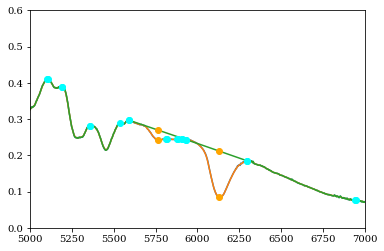

1998aq_combined 1.11 0.22142930942143468 Check:  0.001 524.70460473727 566.6611768846294
0.16775365860881883 2859323.3925455343


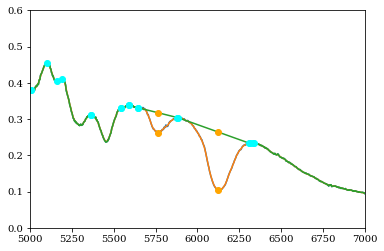

2008hv_combined 1.1336901726437725 0.34496890883909576 Check:  0.001 217.98576812232886 207.0162181449134
0.21083457274508344 22497.04218076249


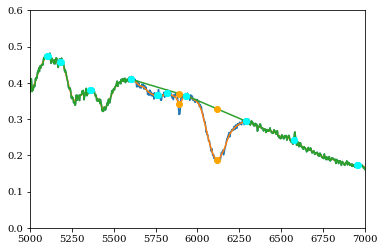

2002de_combined 0.9600000000000001 0.19739790883909542 Check:  0.002 49.332503293127075 36.186722641584005
0.07453302331769822 2091.0536357800274
Could not find maximum in a specified range!
1981b_combined 1.0566495584740765 nan Check:  0.004 5.6618971765811255 5.015944841134715
0.0420114683654107 1602.0845585556665
Could not find maximum in a specified range!
1980n_combined 1.131570526055745 nan Check:  0.0045 4.288137860773898 2.2342482679705125
0.11664752167745013 14439924.614942137


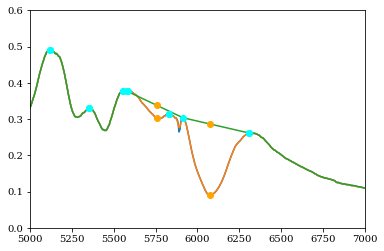

2002bo_combined 1.08 0.17681278872677259 Check:  0.001 509.0891565849248 519.0796750435592
0.412635511555835 18472.311064156955


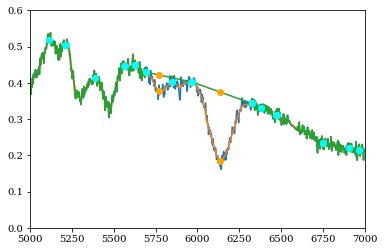

2006cf_combined 1.083574959768155 0.23499363999392936 Check:  0.002 51.367660072785604 55.4805688900241
0.4031971759420064 23736.887587318026


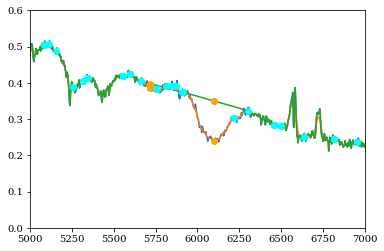

2005ku_combined 1.0398732029441367 0.10387703402588323 Check:  0.0015 63.61677077851375 68.1389404931679
0.1748273256886068 798936.7501728201


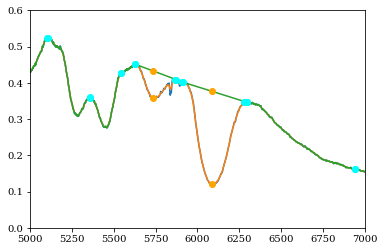

2004fu_combined 1.0800000000000003 0.29878594188965435 Check:  0.001 200.98326692600472 213.93798340863555
0.16267827046461053 421244.75245271565


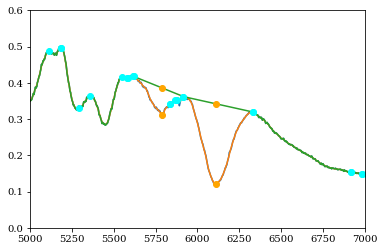

2001da_combined 1.1200000000000003 0.3422712843014616 Check:  0.001 160.63284679676713 168.0629528900941
0.3730191501466037 1681457.6075828646


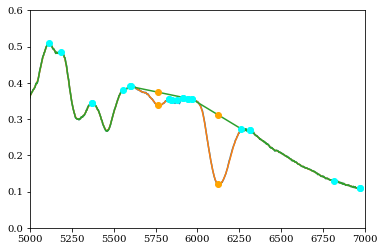

1994ae_combined 0.96 0.1903083014246117 Check:  0.001 413.4747824761486 452.16191255908046
0.13711350212187684 1297884.9101016975


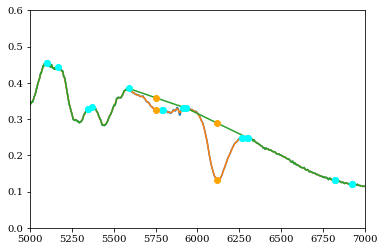

2001fe_combined 1.0 0.2105918572093282 Check:  0.001 202.95323954752453 187.58009675467213
0.3556025787187909 41234.35845543341


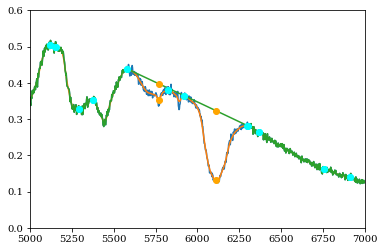

2000fa_combined 1.0 0.23091202789318793 Check:  0.0015 60.307041387553966 64.45062379323
0.3679217974373874 90746.71933255073


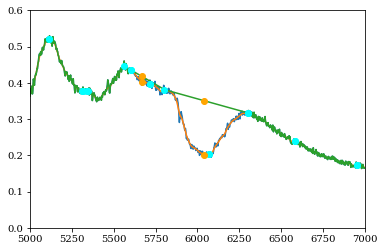

2003w_combined 1.1400000000000001 0.09388815154441342 Check:  0.0015 94.056683413481 92.06404484555091
0.3344829522495639 72617.1126977936


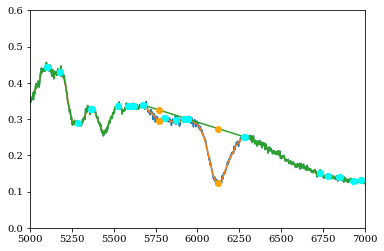

2007f_combined 0.9600000000000001 0.20092974374814176 Check:  0.0015 76.84968152870107 82.6833994728037
0.15061583128990524 485690.4319522247


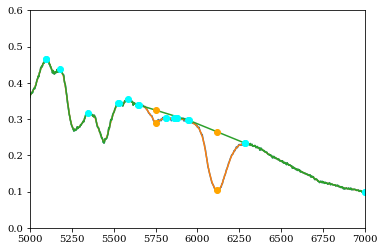

2008bf_combined 1.0500000000000003 0.22479736547720472 Check:  0.001 122.74283233699909 110.301991695254
0.3417948413923685 96912.52570993293


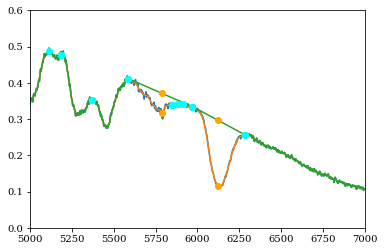

1998v_combined 0.9900000000000001 0.2983535814490764 Check:  0.0015 89.81862728327701 95.65276040154504
0.1223493579265701 636223.1072534347


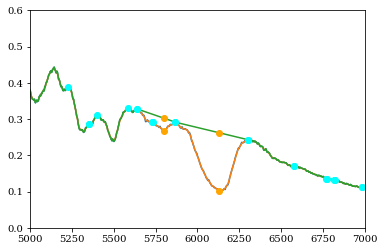

2001bf_combined 0.9900000000000001 0.22150783952435227 Check:  0.001 117.25129353060383 107.05659969782958
0.3259038789123502 41728.80310267266


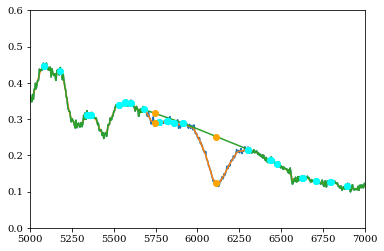

2005hc_combined 1.0299999999999998 0.2111166095502844 Check:  0.0015 60.009018128730986 61.69443649301476
0.1429401042511473 656201.3200821939


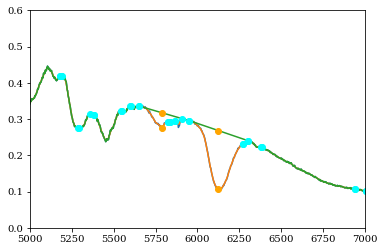

2007a_combined 0.9499999999999998 0.2522367751697145 Check:  0.001 150.48478991549237 156.54039933247248
0.1533536600674819 2060320.0964890737


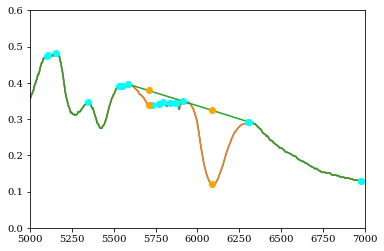

1998dk 1.05 0.19317218749183548 Check:  0.001 269.4729647085601 225.833313606
0.15572150071670016 16750.86101679533


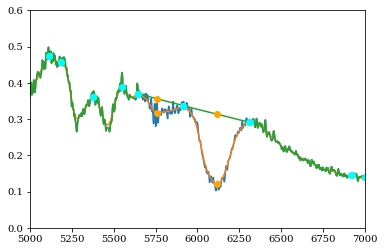

2005ms 1.02142208206 0.20491042052052838 Check:  0.003 29.99974709271669 27.7512572086
0.16171440478205518 39715.56445939676
Could not find maximum in a specified range!
2006or 1.06267601692 nan Check:  0.003 37.220095933065274 32.770383588
0.16063558395928518 47789.541791602445


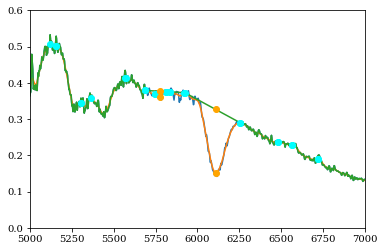

2007bz 1.05 0.08447757247791726 Check:  0.002 41.93391991688919 40.7215753614
0.15304145968237723 649124.0162398805


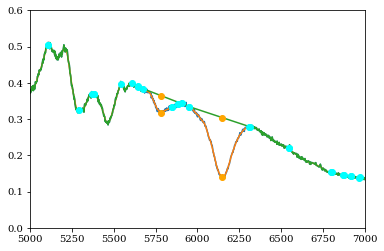

2007o 1.13613975141 0.2871689562603779 Check:  0.001 126.9299508343649 122.09537492
0.4155559798686682 645.437558485123


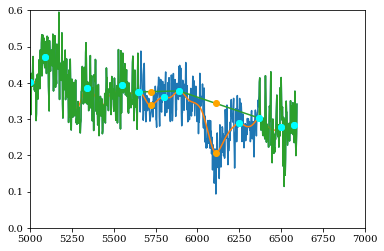

1996ab 1.01 0.2777056469956795 Check:  0.004 9.884744851812663 10.2248512023
0.3681690830253578 13348.113162067273


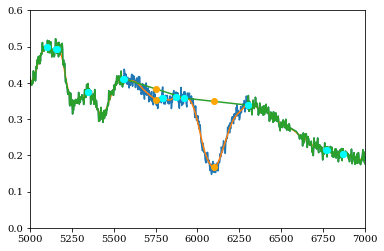

1996bl 1.07 0.16475918209952994 Check:  0.003 36.82943040666518 37.4449261727
0.33949665357898484 25126.410634110616


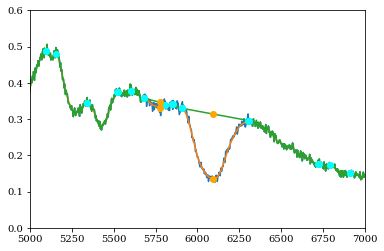

1998ec 1.08 0.09017682566066083 Check:  0.002 46.180959184967094 48.1948878696
0.3436957929754897 35319.964576227554


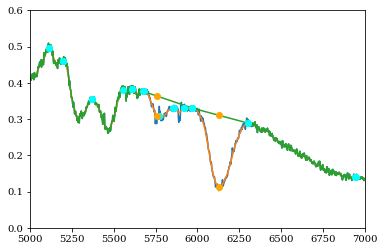

1998eg 1.14 0.28070820089828485 Check:  0.002 57.41520307370725 61.3341157587
0.3952436559439296 10017.349817716475


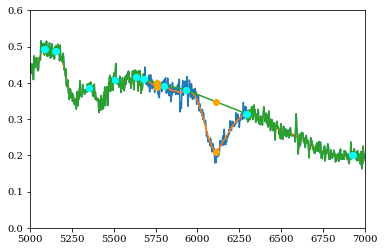

2001az 1.09 0.08574912037608867 Check:  0.003 35.26418124370168 36.3542529791
0.3756770032641188 72195.63579461847


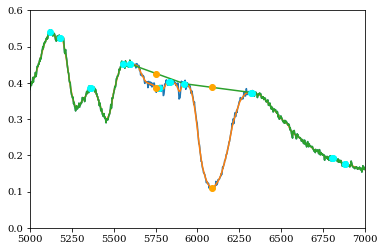

2001en 1.12 0.14504597024218405 Check:  0.0015 87.09168106688598 91.9202350873
0.3893552012128927 26783.796142047886


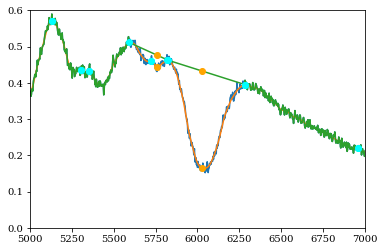

2002bf 1.12 0.12428912422183708 Check:  0.002 58.55646920125651 59.1928499864
0.32543048302419814 6362.665601101292


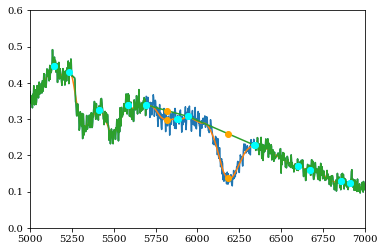

2002hu 1.05 0.22364050063014274 Check:  0.003 22.570425117176537 23.8682813254
0.362982729537483 48034.08687568641


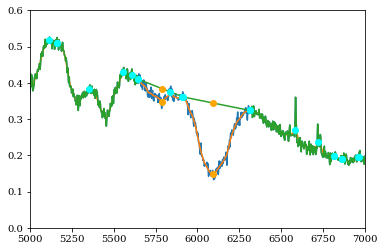

2003kc 1.14019986122 0.1835283368366289 Check:  0.0015 74.26230890885091 76.5643723896
0.34092136147679725 17628.306186449998


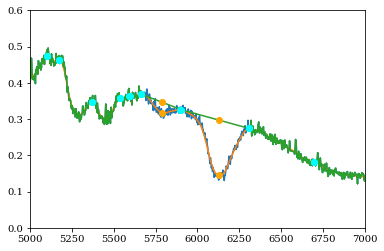

2004bg 1.05 0.19319095824540508 Check:  0.003 39.460349640528854 42.0932504084
0.3204221838070397 41620.21138327655


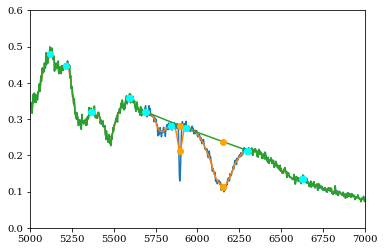

2006et 1.02 0.5501318313942315 Check:  0.002 56.61720603912912 61.2158469628
0.3874948683178048 2714.1820572413812


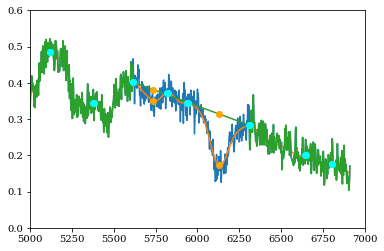

2007ae 0.98 0.22339193701938106 Check:  0.004 17.982344112538705 18.9312262903
0.2364990732747007 25038.935637524126


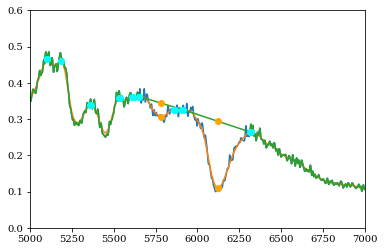

2004ey 1.00821961936 0.20231885196092034 Check:  0.003 32.24434384222496 35.6110499029
0.21052194545964056 102577.90587163005


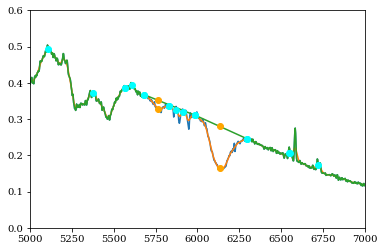

2005bg 1.06633511992 0.2077216871470774 Check:  0.0015 66.07241335644927 61.5188801541
0.3176303824008964 14375.64895166846


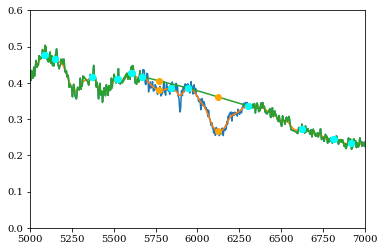

2006hx 1.05273249926 0.27574229737711675 Check:  0.003 37.22487032193809 40.6443484778
0.14892445959755893 28717.666039021595


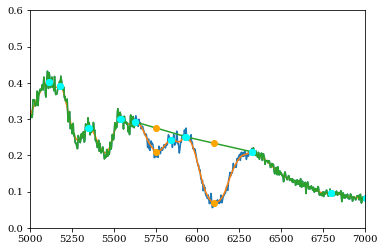

2006os 1.07098749844 0.39500824095172216 Check:  0.003 20.147415599641654 20.9915750298
0.20906976594628685 73483.89531131668


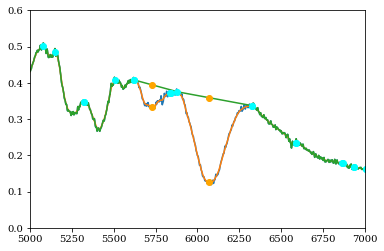

2007as 1.11396538206 0.26308794769971894 Check:  0.0015 65.5316811214929 70.8910937336
0.20459486113084976 98248.37294548877


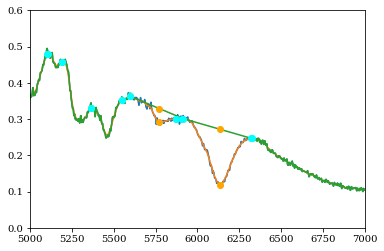

2008bq 1.00130644601 0.24697322542502084 Check:  0.002 55.99793693844427 59.4741697838
0.48369216030236284 54942.77310005907
Could not find maximum in a specified range!
2001ba 1.03352873666 nan Check:  0.001 124.75543023807975 119.958294489
0.4190746248399836 131269.4827205795
Could not find maximum in a specified range!
2012cg 1.039 nan Check:  0.001 153.4519092262354 163.417632742
2
0.11296331004216466 638670.4439758708


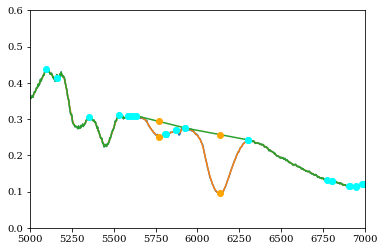

1995e_combined 1.1600000000000001 0.2580297865787124 Check:  0.001 110.42335850684437 99.16991579153026
0.14800728543650346 2577489.423773137


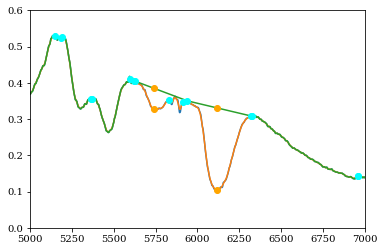

2002er_combined 1.23 0.25735510528388095 Check:  0.001 426.9521209441677 410.0085929972205
0.16209737933382692 25121.30510114136


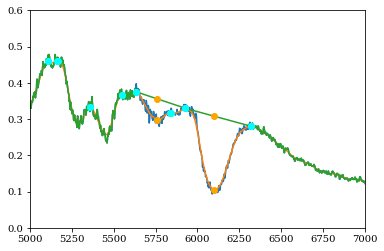

2003cq_combined 1.1999999999999997 0.2814917663851729 Check:  0.003 35.30044602500246 29.74211747072116
0.31348720650285666 60498.97800925637


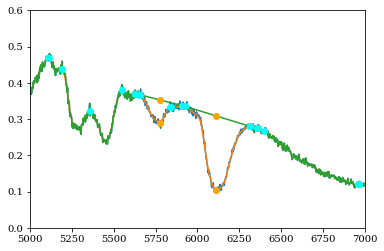

2002kf_combined 1.1999999999999997 0.3146481712408035 Check:  0.0015 66.51650821403999 72.0686280693613
0.2635628587591655 633378.6729605516


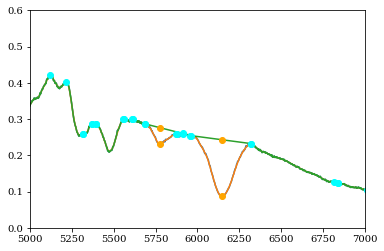

2002cr_combined 1.1899999999999997 0.2861293159981717 Check:  0.001 189.8665632377833 202.70746199794644
0.12951680374626556 1864813.0443175114


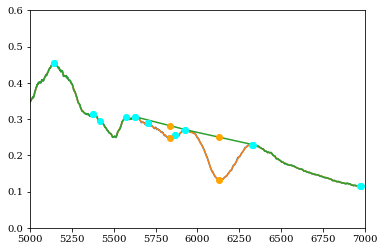

1999ac_combined 1.2300000000000002 0.2812944861056012 Check:  0.001 229.67625412651734 208.70921232305818
0.13834543863199739 758957.9377321478


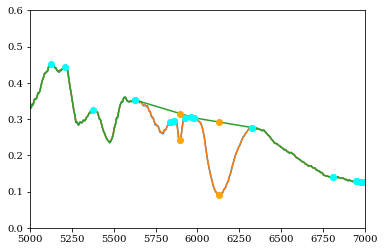

1999gd_combined 1.1799999999999997 0.36270694491629984 Check:  0.001 157.10672905495855 151.3140997973604
0.22493073825462234 30759.937847313922


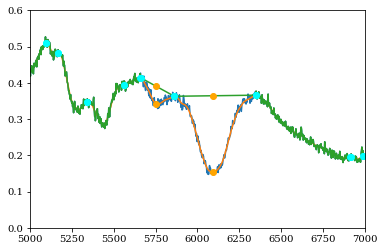

2007jg_combined 1.17 0.22604138662135975 Check:  0.002 50.2499588446229 55.03173284413796
0.283010799737936 119583.26531809688


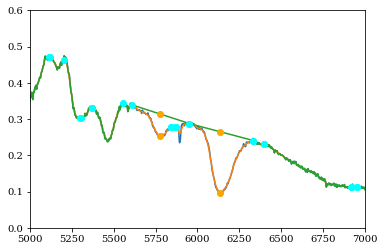

2005kc_combined 1.2400000000000002 0.35784178018692053 Check:  0.0015 89.13463920662896 95.30044595578113
0.13203622739427118 302912.9454105395


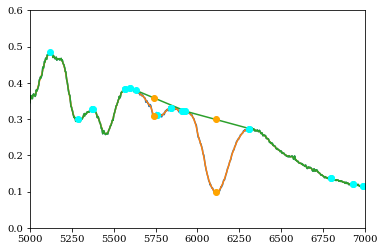

2007co_combined 1.1600000000000001 0.24276611931206554 Check:  0.001 103.35770786459234 84.20133610378988
0.20853364731733762 173143.90729143337


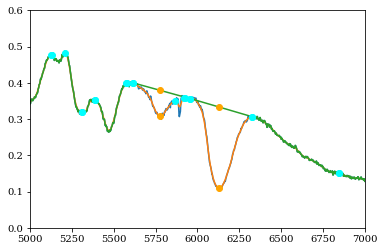

1997y_combined 1.1500000000000001 0.3196419827968235 Check:  0.0015 95.72232938231961 90.85221051165247
0.17994396397780926 696372.7471684094


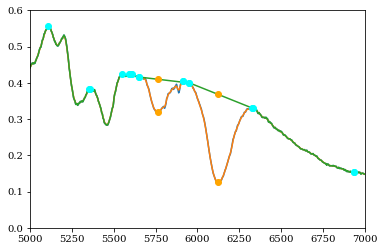

2002ha_combined 1.22 0.36984409838235266 Check:  0.001 215.84846109481882 204.97746373570192
0.31664493961242524 36298.71293703779


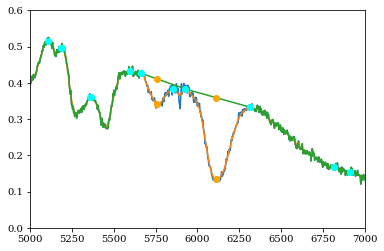

2003ch_combined 1.2200000000000002 0.30880775411287975 Check:  0.002 56.774109800904014 53.57389657615653
0.16088546657710612 352042.5778981915


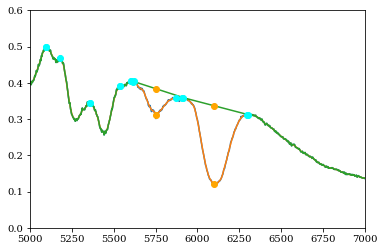

2006sr_combined 1.24 0.33707188292497325 Check:  0.001 134.83427992859035 119.53719498820413
0.07820562879614522 1032.642629124224


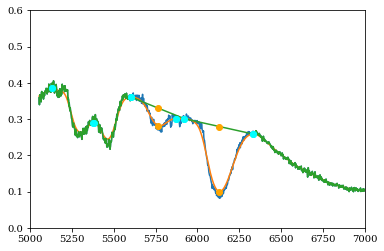

2005w 1.22957865079 0.2694552082388166 Check:  0.0045 3.5505215566391226 2.6092297517
0.30454838613077556 160097.50072643222


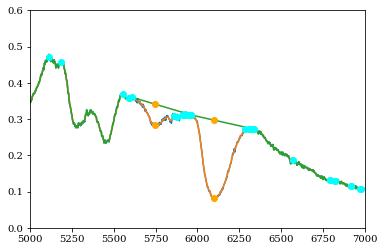

1998dh 1.17 0.2697373531994714 Check:  0.001 105.02876957888478 111.086683295
3
0.24751895558047518 3315258.508860429


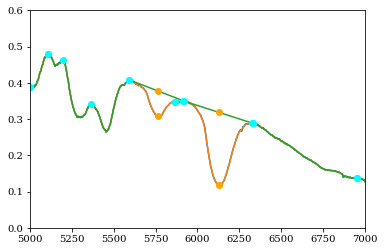

1994d_combined 1.3700000000000003 0.3441653234676004 Check:  0.001 398.55532025912714 420.6914626439281
0.37757960760972364 380374.00206493295


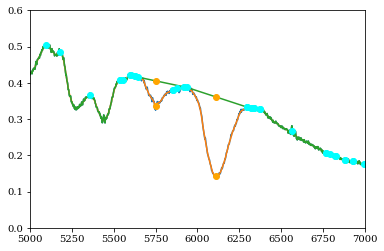

2003it_combined 1.36 0.3161914709868067 Check:  0.001 204.9799497648276 216.6945229637388
0.13190718737086976 7074798.203403645


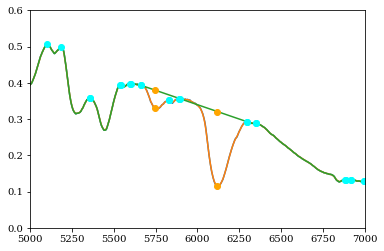

1996x_combined 1.26 0.24382814931026497 Check:  0.001 546.6443036624806 433.2478632919565
0.36497884143846054 10372.816659708747


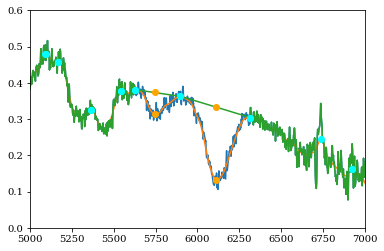

1998dx_combined 1.3200000000000005 0.29165837634168085 Check:  0.003 33.480558928824294 35.891477478862015
0.14378204699028976 334559.736940324


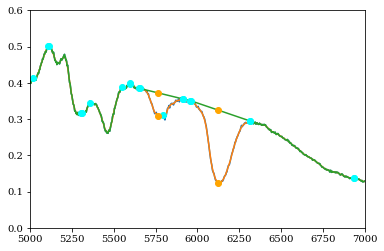

2005el_combined 1.2699999999999998 0.3194719251335506 Check:  0.001 119.83975064249299 99.96179405631545
0.22465631178083245 57315.86005949929


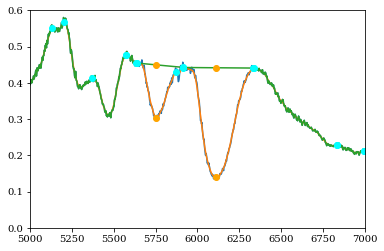

2004gs_combined 1.41 0.4823436036861702 Check:  0.0015 70.70372184604057 64.28386151797476
0.15569524833748521 3136998.67695342


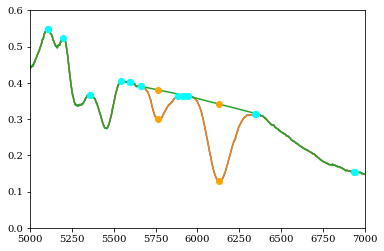

2006d_combined 1.35 0.38204368986818893 Check:  0.001 362.7475086572466 373.1515480086387
0.14406136617658533 1228455.4836763917


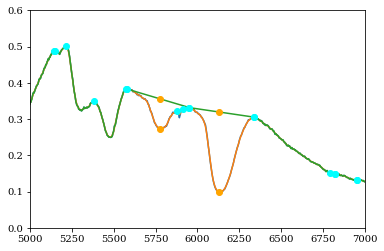

2001ep_combined 1.3000000000000003 0.375166105802384 Check:  0.001 199.3520198009078 189.62740873536734
0.2633679175099344 33339.01109668719


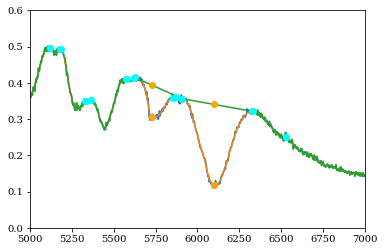

2004ef_combined 1.3900000000000003 0.39324968144782 Check:  0.0015 67.02798492822227 81.37113868647357
0.3577551613997737 36507.402043903756


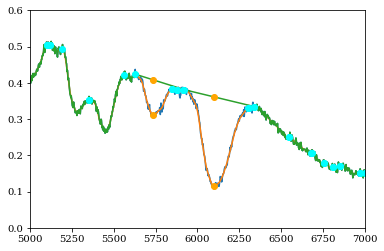

1999cc_combined 1.3500000000000003 0.39296233881261244 Check:  0.0015 61.53524918653312 66.55953623072278
0.29700328706527745 1267698.8339417474


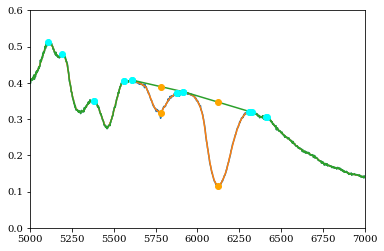

2005ki_combined 1.4100000000000001 0.3216899271937544 Check:  0.001 218.52987236626205 226.07203537654243
0.245428015638207 100027.63045896073


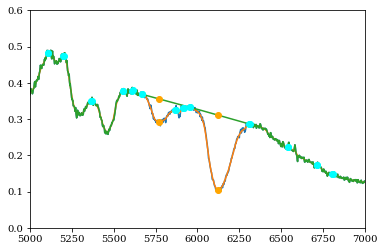

2005bo_combined 1.2799999999999998 0.31668160624741853 Check:  0.0015 61.97691831865791 67.78933183948803
0.27684689642354504 79594.32916520865


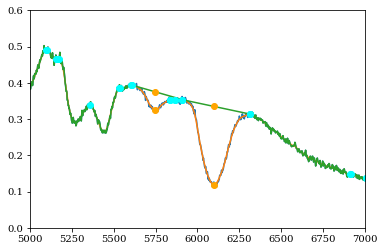

2007bd_combined 1.3 0.22674761342692326 Check:  0.0015 69.3235901654657 79.0904342211971
0.12253136015544441 388312.75201113976


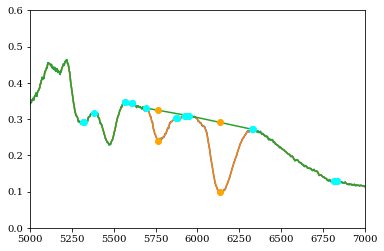

2007bc_combined 1.3700000000000006 0.4339598795269958 Check:  0.001 110.48506680468553 101.6747557809324
0.1364261526737618 157180.96641502067


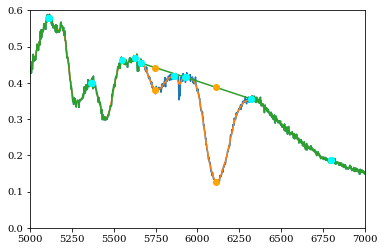

2005lz 1.34 0.24182762886256107 Check:  0.0015 67.63154111083797 67.2021744101
0.16759193982914306 372958.22932563355


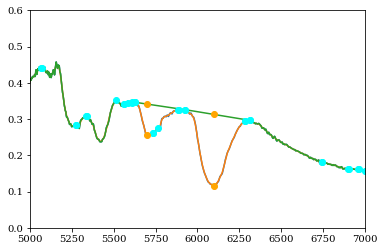

2006ej 1.26659174257 0.43167509614196437 Check:  0.001 119.03293612665837 107.94997635
0.423376260176005 7423.863847935248


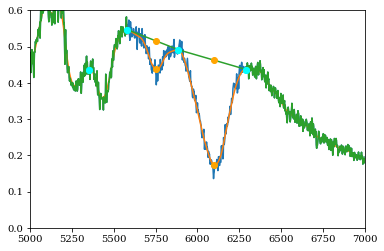

1994m 1.26 0.26993151168622326 Check:  0.003 26.764818815760894 26.5734090305
0.40383141220334196 30159.518075461747


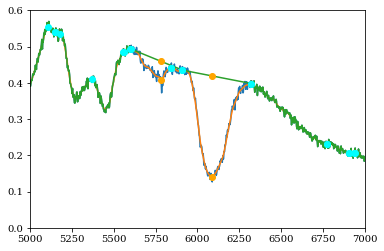

1998ef 1.27 0.18667717303795853 Check:  0.0015 62.56053733135117 65.6590338618
0.3447201154424727 5938.836770854396


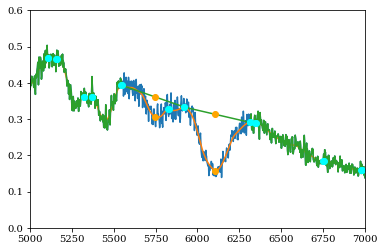

2002g 1.25 0.35334275655782516 Check:  0.003 23.01291844812561 23.2306162189
0.37095002433811664 4002.6241288513766


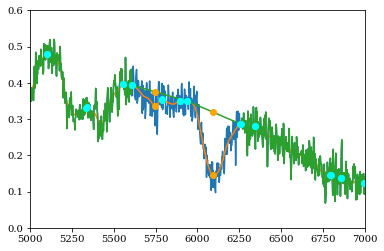

2003ic 1.30686535341 0.22162705181626413 Check:  0.003 21.906777671786976 22.7842597003
0.3078553858580659 30295.407628235233


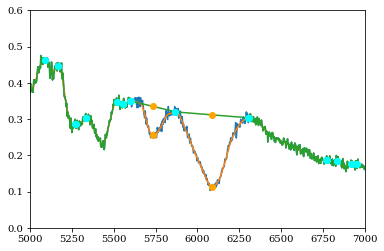

2005am 1.3 0.40031036267347503 Check:  0.002 51.46799214849887 53.4674841717
0.35122434356486326 10791.53493163662


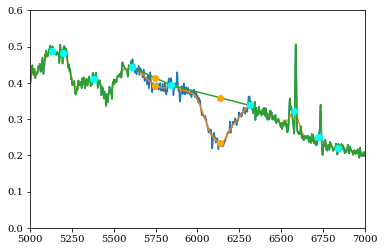

2006fw 1.28774437183 0.16875982386445137 Check:  0.003 33.86062257886551 29.9279198719
0.1978125547655486 52568.48668492996


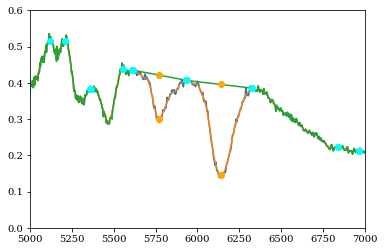

2015f 1.26 0.481629888256416 Check:  0.002 51.60195806757062 44.7480824439
4
0.0899831995015952 4898.621850707794
Could not find maximum in a specified range!
1992a_combined 1.47 nan Check:  0.004 13.09890225029313 6.856957174449738
0.1446663636574096 196037.52850273275


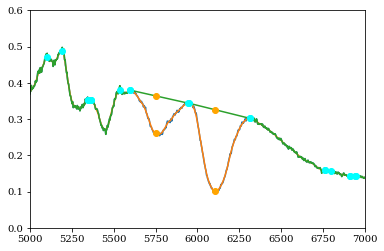

2007ci_combined 1.6000000000000003 0.45665364388494867 Check:  0.0015 89.1726271267128 78.54510673082652
0.1847802167813949 450702.4821488723


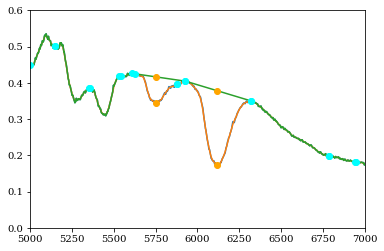

2006n_combined 1.5 0.3514370127752036 Check:  0.001 138.44482801329852 94.4811076291473
0.3699792761093429 150198.35422506928


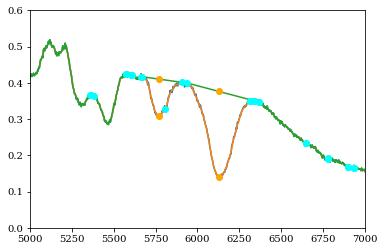

1999ej_combined 1.48 0.4318619480492309 Check:  0.001 125.25045815498628 133.02690343777078
0.19849350929949802 962923.138011279


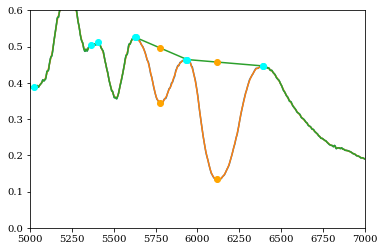

1999gh_combined 1.69 0.46589275077736736 Check:  0.001 249.74841068171136 200.32208865769104
0.35239396423953645 23766.698277501793


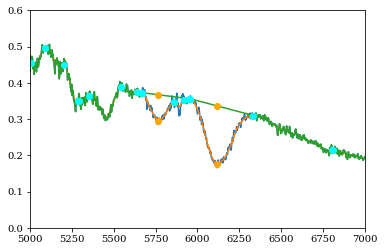

2001fh_combined 1.5100000000000002 0.44882946111334077 Check:  0.002 46.731789887351816 50.52782635984504
0.20425643884044392 48745.39531454467


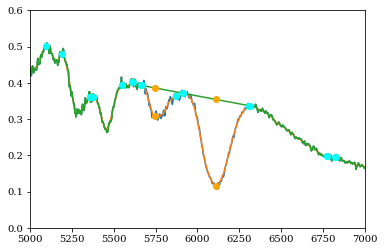

2003u_combined 1.4600000000000004 0.3234044121016427 Check:  0.002 57.031462668892765 56.096788442360456
0.15986286713319414 405552.47167113965


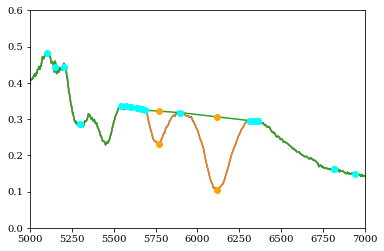

2006kf_combined 1.55 0.455289396904289 Check:  0.001 111.47795022773535 110.46618120231693
0.3750247953272292 1353.7380083658497


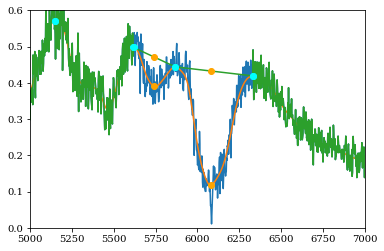

1994t_combined 1.5100000000000005 0.25636647839098275 Check:  0.004 10.879585488099375 11.24257350467516
0.2575747663388507 13895.00754377226


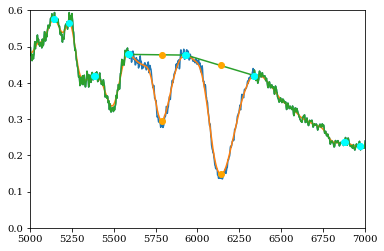

2006gt_combined 1.66 0.6040867428827897 Check:  0.003 35.97465647603764 36.752585036151515
0.23779809236327576 646479.1412033972


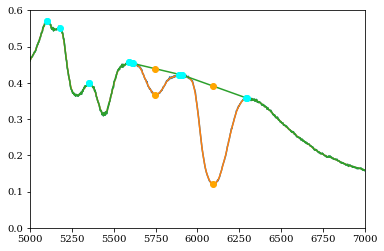

2002he_combined 1.4399999999999997 0.26514926641388475 Check:  0.001 221.79831663315034 219.07513397107334
0.1855756767738677 5286594.370723292


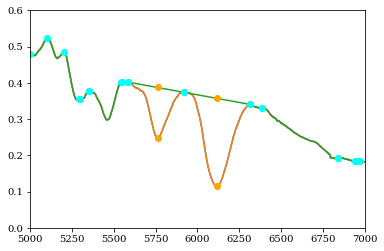

2007on_combined 1.6410642282933745 0.5695330951567983 Check:  0.001 550.7220959122826 422.566975543358
0.35436147370019855 72526.96809082497


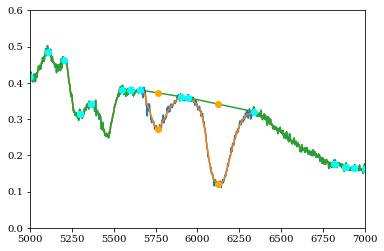

2003iv_combined 1.6499999999999995 0.45296759757069227 Check:  0.0015 84.65586282640679 90.29070665191914
0.17796948178599828 282637.3110099979


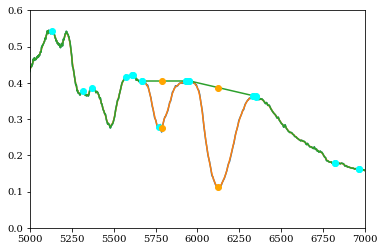

2000dk_combined 1.6200000000000003 0.4743545219163055 Check:  0.001 120.54754219459089 105.03075614779226
0.4172371114724697 23344.96754891737


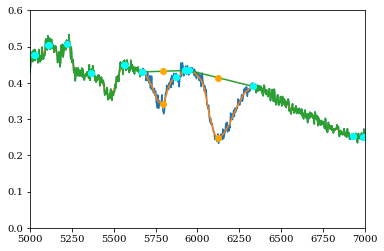

2002do 1.56 0.5445049455573127 Check:  0.002 54.2158824615934 56.9630153063
0.3362143964140341 5557.985822041606


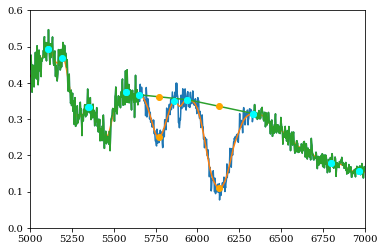

2002hw 1.44 0.49196568039243915 Check:  0.003 21.131989742296817 21.6202650869
0.45325885708293734 12245.735312551611


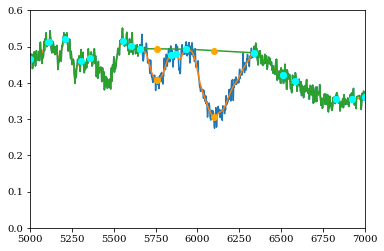

2005mc 1.63 0.47338326908271366 Check:  0.002 44.92410174494156 48.9215632894
0.3706589435098201 11322.915149205091


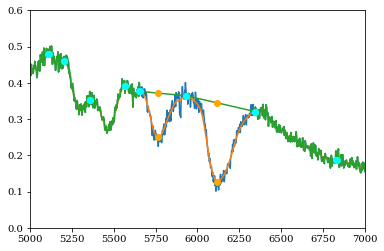

2006gj 1.48 0.5592670382793741 Check:  0.003 34.89255610837302 36.7142131009
0.4182055759961977 4984.803692944448


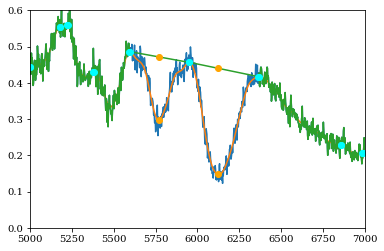

2007au 1.69 0.5951569174585027 Check:  0.003 27.614584489775414 27.759865527
0.285883501242312 382768.79090466164


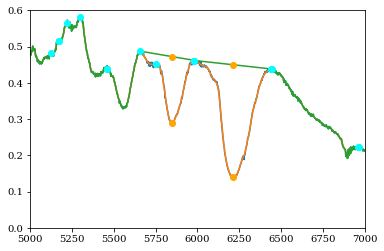

2008r 1.54 0.5861422550178335 Check:  0.001 176.00506563431614 167.767706861
5
0.3430182787265109 86866.46260806324


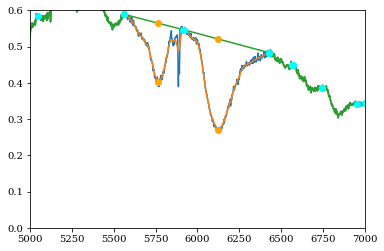

2006mr_combined 1.9163719273424464 0.640490778469074 Check:  0.0015 90.85171457283862 99.19751923403706
0.267165389700808 51461.09483972925


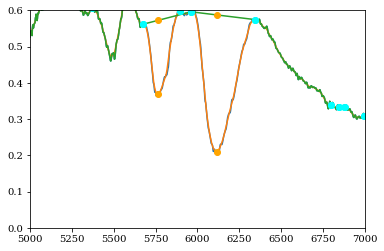

1999da_combined 1.8999999999999997 0.5355264268181944 Check:  0.0015 78.19436993194644 66.21314957003372
0.3028160523568938 11702.671638643025


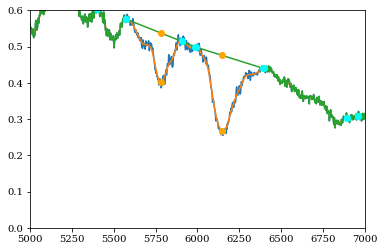

2007ax_combined 1.8700000000000003 0.6464579379310974 Check:  0.002 57.389124452955635 59.160702107084994
0.5014477603437941 12152.54680331655


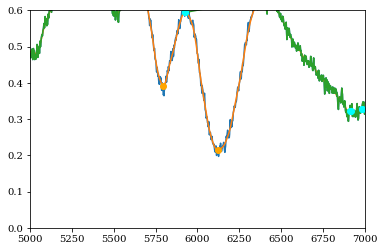

1998de_combined 1.8799999999999992 0.6335441225247113 Check:  0.002 50.721640929048505 53.22822660555484
0.3310698579164868 340759.42711882445


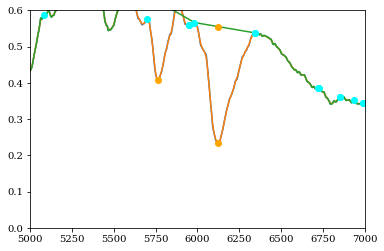

1991bg_combined 1.8268286491759538 0.6742412957875572 Check:  0.001 226.66420540725372 205.41880261829468
0.34420501104237444 314548.7727818333


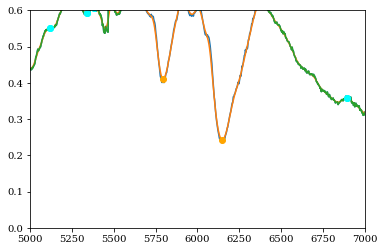

1999by_combined 1.97 0.6712789230430282 Check:  0.001 215.11235170027274 226.10913028315096
0.31291148331341023 104543.15177401742


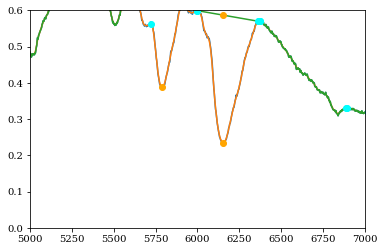

2005ke_combined 1.82 0.729989102365145 Check:  0.001 155.5437464019789 119.93193658365149
0.46966849173677944 187503.75618814066


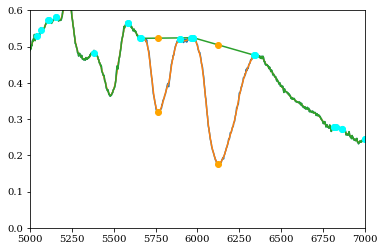

1998bp_combined 1.7899999999999996 0.6193893499064442 Check:  0.001 178.2095080316596 183.88218640981398
0.4640222636705283 10859.272120392692


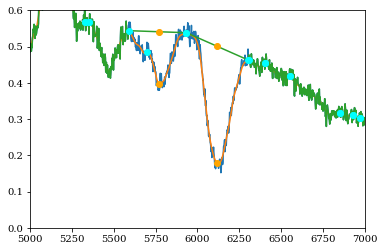

2002fb_combined 1.77 0.4444517018939564 Check:  0.002 42.33918522273475 45.865789729343255
0.28498798712519136 622787.190479981


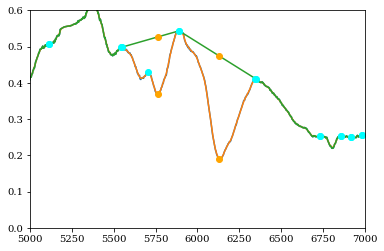

2009f_combined 1.8672551556208836 0.5553176467055978 Check:  0.001 252.3294311660898 235.0214802802703
0.28363601446049896 3659.1457254587526


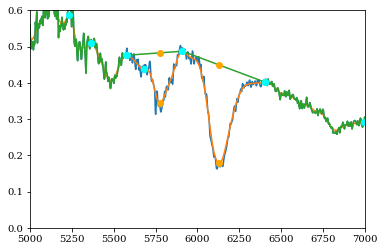

2006cs 1.9352579802 0.511915210608985 Check:  0.003 27.712310429520365 17.7523768404
0.2792971429553127 348537.97746527375


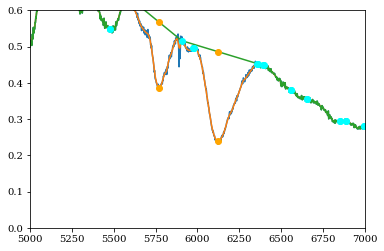

2007n 1.874690474 0.7295164869829863 Check:  0.001 140.7294855107669 143.915468826
0.5056524322003743 6019.347165215361


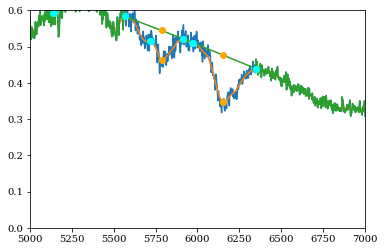

2007al 1.89 0.6213998922215471 Check:  0.003 37.987748813209365 42.3829815175


In [18]:
all_dm15s_med = []
all_ratios_med = []
i=0
bad_measurements = ['sn2004dt-20040816.413-ui-corrected.flm','sn1997bp-19970407.42-mmt.flm','sn2003W-20030207.40-fast.flm',
                    'sn2005A-20050107.25-fast.flm','SN08ia_081210_r01_NTT_EF.dat','SN06mr_061109_r01_CLA_LD.dat',
                    'sn2006bt-20060428.425-ui.flm', 'sn1998es-19981125-ui-corrected.flm','sn1999aa-19990223-ui.flm',
                    'sn1999dq-19990911.46-fast.flm','sn2001V-20010301.47-fast.flm','sn2007S-20070209.30-fast.flm',
                    'SN08fp_080921_b01_DUP_WF.dat','sn2001bf-20010516-ui-corrected.flm','sn2006cz-20060626.304-ui.flm',
                    'sn1999cl-19990612.17-fast.flm','sn2005el-20050928.47-fast.flm']
for sn_arr in sn_arrays_med:
    print i
    dm15_bin = []
    ratio_bin = []
    for SN in sn_arr:
        if SN.dm15_source != None:
            dm15 = SN.dm15_source
        else:
            dm15 = SN.dm15_from_fits
        var = 1./SN.ivar
        if SN.source != 'swift_uv' and SN.filename not in bad_measurements:
            print np.median(SN.flux[SN.x1:SN.x2]), np.median(SN.ivar[SN.x1:SN.x2])
#             vexp, SNR = sa.find_vexp(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            vexp, SNR = sa.autosmooth(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], var_y = var[SN.x1:SN.x2])
            r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=vexp, dm15 = dm15)
            print SN.name, SN.dm15, r, 'Check: ', vexp, SNR, SN.SNR
            dm15_bin.append(SN.dm15)
            ratio_bin.append(r)
    all_dm15s_med.append(dm15_bin)
    all_ratios_med.append(ratio_bin)
    i+=1

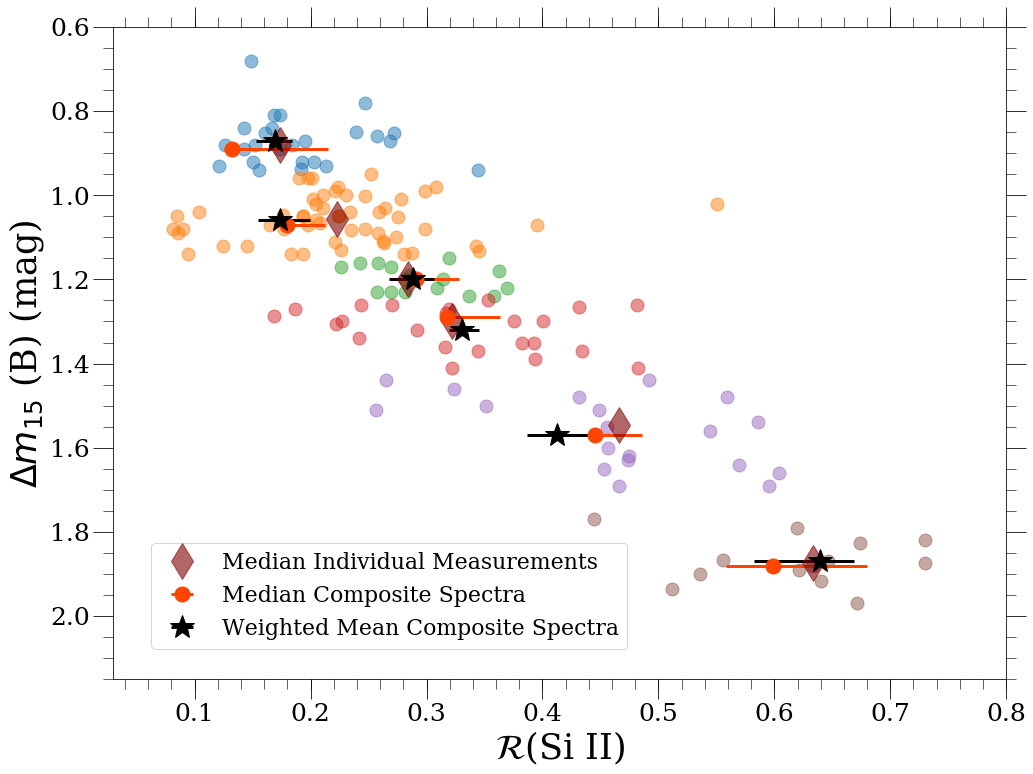

In [19]:
plt.rc('font', family='serif')
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16, 12, forward = True)
plt.minorticks_on()
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('$\mathcal{R}$(Si II)', fontsize = 35)
plt.ylabel('$\Delta m_{15}$ (B) (mag)', fontsize = 35)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
dm15_bin_medians = []
ratio_bin_medians = []
for i in range(len(all_dm15s_med)):
    dm15_bin_medians.append(np.nanmedian(all_dm15s_med[i]))
    ratio_bin_medians.append(np.nanmedian(all_ratios_med[i]))
    plt.plot(np.asarray(all_ratios_med[i]), all_dm15s_med[i], 'o', alpha=.5, markersize=13, zorder=1)
plt.plot(ratio_bin_medians, dm15_bin_medians, 'd', markersize=25, alpha=.6, color = 'maroon', label='Median Individual Measurements')
plt.errorbar(si_ratios_med, dm15s_med, xerr=errors_med, color = 'orangered', fmt='o', markersize=15, elinewidth=3, capthick=3, label='Median Composite Spectra')
plt.errorbar(si_ratios_mean, dm15s_mean, xerr=errors_mean, fmt='k*', markersize=25, elinewidth=3, capthick=3, label='Weighted Mean Composite Spectra')
plt.gca().invert_yaxis()
plt.xlim([0.03,0.8])
plt.ylim([2.15, 0.6])
# plt.legend(loc=3, fontsize = 20, numpoints=1)
plt.legend( loc=3, bbox_to_anchor=(0.03, 0.03, 0.48, 0.5), fontsize=22, numpoints=1)
# plt.savefig('../../../Paper_Drafts/main_composites_updated/si_ratio_wmedian.pdf', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../Paper_Drafts/plot_images/si_ratio_wmedian.png', dpi = 300, bbox_inches = 'tight')
# plt.savefig('../../../FLASH/si_ratio_median.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [22]:
for i in range(len(all_dm15s_med)):
    for k in range(len(all_ratios_med[i])):
        if ~np.isnan(all_ratios_med[i][k]):
            print all_ratios_med[i][k], all_dm15s_med[i][k]

0.18367668791019698 0.8800000000000001
0.16676908516384867 0.84
0.2027522924284995 0.92
0.16881136783470474 0.8100000000000004
0.15545608766942137 0.9399999999999998
0.2572735189984369 0.8599999999999999
0.14263140102920924 0.8900000000000001
0.14233633890141806 0.8399999999999999
0.15037021429431707 0.92
0.1523615987506983 0.8800000000000001
0.12064291730783099 0.9299999999999999
0.19299138333983717 0.9199999999999999
0.14895406906959988 0.6799999999999999
0.17384056648479265 0.8100000000000003
0.24725508826517273 0.7799999999999999
0.23944575545625443 0.8499999999999996
0.1265854254612489 0.8800000000000001
0.19516192472881946 0.8699999999999999
0.3446138529922509 0.9399999999999997
0.26854012400997856 0.87
0.1917687599841672 0.938834805412
0.21354626135527713 0.93
0.1604913930534738 0.852109516951
0.2722406158689495 0.852109516951
0.17371558063170806 0.89
0.17590307500849622 1.0465189775571149
0.19778613757779792 1.0700000000000003
0.2739357716880513 1.0999999999999999
0.24683028690

In [ ]:
test_dm15s = []
test_ratios = []
for SN in sn_arrays_med[1]:
    if SN.dm15_source != None:
        dm15 = SN.dm15_source
    else:
        dm15 = SN.dm15_from_fits
    var = 1./SN.ivar
#     r = sa.measure_si_ratio(SN.wavelength[SN.x1:SN.x2], SN.flux[SN.x1:SN.x2], varflux = var[SN.x1:SN.x2], vexp=.002, dm15 = dm15)
    print SN.filename, dm15, SN.phase

In [ ]:
comp1 = comps_dm15_max_fewer_bins_med[0]
comp2 = comps_dm15_max_fewer_bins_mean[0]

In [ ]:
r = sa.measure_si_ratio(comp2.wavelength[comp2.x1:comp2.x2], comp2.flux[comp2.x1:comp2.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_mean:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

In [ ]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()

In [ ]:
r = sa.measure_si_ratio(comp1.wavelength[comp1.x1:comp1.x2], comp1.flux[comp1.x1:comp1.x2], vexp=.002)
print r
scale_n = np.linspace(.1,3,100)
r_dist_comps = []
noise_level_comps = []
for comp in comps_dm15_max_fewer_bins_med:
    r_dist = []
    noise_level = []
    for n in scale_n:
        noise = np.random.normal(0., scale=n*.01, size=len(comp.flux))
        r_noise = sa.measure_si_ratio(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2]+noise[comp.x1:comp.x2], vexp=.002, plot=False)
        noise_level.append(n*.01)
        r_dist.append(r_noise)
    r_dist_comps.append(r_dist)
    noise_level_comps.append(noise_level)
    print 'done'

In [ ]:
for i in range(len(r_dist_comps)):
    print np.average(r_dist_comps[i])
    plt.plot(noise_level_comps[i], r_dist_comps[i])
    plt.show()